In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [8]:
## 분류 싱글
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from IPython.display import Image
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [9]:
df=pd.read_excel("/content/KDX2021_SSC_ONLINE_DATA.xlsx")
df

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101
...,...,...,...,...,...,...,...,...
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470
21553,202005,골프용품,평일,금,D.14-18시,F,C.4O대,107
21554,202105,스포츠의류용품,평일,화,E.18-22시,M,B.3O대,603
21555,202105,인테리어,평일,화,C.10-14시,F,E.60대이상,415


### ***EDA***

 **성별별 물품 구매현황** 

In [10]:
A=df.groupby(["성별","TAG"]).mean()
list(A['건수합계'])
A.loc['F',:].index
A.loc['F',:]['건수합계']

TAG
가전          646.487773
골프용품         37.514032
생활/사무용품    2686.543590
서적          619.996139
스포츠의류용품     286.540750
식료품        2635.503846
애완용품        255.193548
유아용품        493.358612
인테리어        779.215661
차량정비_부품      87.938992
취미용품        210.579221
패션         4085.270513
홈쇼핑        3643.867949
화장품        1267.456410
Name: 건수합계, dtype: float64

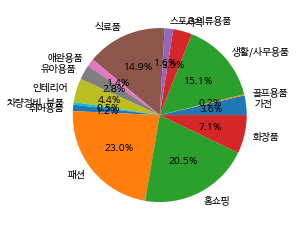

In [11]:
#여자들이 많이 사는 물품
ratio = list(A.loc['F',:]['건수합계'])
labels = list(A.loc['F',:].index)

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

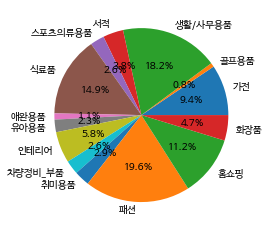

In [12]:
#남자들이 많이 사는 물품
ratio = list(A.loc['M',:]['건수합계'])
labels = list(A.loc['M',:].index)

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 라벨인코딩

In [13]:
list(set(df['TAG'])) , list(set(df['시간대'])) , list(set(df['연령대']))

(['차량정비_부품',
  '화장품',
  '유아용품',
  '가전',
  '스포츠의류용품',
  '홈쇼핑',
  '서적',
  '생활/사무용품',
  '골프용품',
  '패션',
  '식료품',
  '인테리어',
  '취미용품',
  '애완용품'],
 ['A.02-06시', 'B.06-10시', 'E.18-22시', 'C.10-14시', 'F.22-02시', 'D.14-18시'],
 ['C.4O대', 'B.3O대', 'D.5O대', 'E.60대이상', 'A.2O대'])

In [14]:
encoder=LabelEncoder()
df['TAG'].unique()
encoder.fit(df['TAG'].unique())
target=encoder.transform(df['TAG'])

df['TAG']= target
df['TAG']


0         7
1         2
2         1
3        13
4         8
         ..
21552    11
21553     1
21554     4
21555     8
21556     7
Name: TAG, Length: 21557, dtype: int64

In [15]:
encoder.classes_

array(['가전', '골프용품', '생활/사무용품', '서적', '스포츠의류용품', '식료품', '애완용품', '유아용품',
       '인테리어', '차량정비_부품', '취미용품', '패션', '홈쇼핑', '화장품'], dtype=object)

In [16]:
encoder2=LabelEncoder()
df['연령대'].unique()
encoder2.fit(df['연령대'].unique())
target=encoder2.transform(df['연령대'])

df['연령대']= target
df['연령대']

0        0
1        2
2        1
3        2
4        3
        ..
21552    2
21553    2
21554    1
21555    4
21556    2
Name: 연령대, Length: 21557, dtype: int64

In [17]:
encoder2.classes_

array(['A.2O대', 'B.3O대', 'C.4O대', 'D.5O대', 'E.60대이상'], dtype=object)

In [18]:
df['시간대'].unique()

array(['B.06-10시', 'D.14-18시', 'F.22-02시', 'C.10-14시', 'A.02-06시',
       'E.18-22시'], dtype=object)

In [19]:
encoder3 = LabelEncoder()
df['시간대'].unique()
encoder3.fit(df['시간대'].unique())
target=encoder3.transform(df['시간대'])

df['시간대']= target
df['시간대']

0        1
1        3
2        5
3        3
4        2
        ..
21552    5
21553    3
21554    4
21555    2
21556    2
Name: 시간대, Length: 21557, dtype: int64

In [20]:
encoder3.classes_

array(['A.02-06시', 'B.06-10시', 'C.10-14시', 'D.14-18시', 'E.18-22시',
       'F.22-02시'], dtype=object)

In [21]:
encoder4 = LabelEncoder()
df['평일휴일'].unique()
encoder4.fit(df['평일휴일'].unique())
target=encoder4.transform(df['평일휴일'])

df['평일휴일']= target
df['평일휴일']

0        0
1        0
2        1
3        1
4        0
        ..
21552    0
21553    0
21554    0
21555    0
21556    0
Name: 평일휴일, Length: 21557, dtype: int64

In [22]:
encoder4.classes_

array(['평일', '휴일'], dtype=object)

In [23]:
encoder5 = LabelEncoder()
df['성별'].unique()
encoder5.fit(df['성별'].unique())
target=encoder5.transform(df['성별'])

df['성별']= target
df['성별']

0        0
1        1
2        1
3        0
4        0
        ..
21552    1
21553    0
21554    1
21555    0
21556    1
Name: 성별, Length: 21557, dtype: int64

In [24]:
encoder5.classes_

array(['F', 'M'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21557 entries, 0 to 21556
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CRI_YM  21557 non-null  int64 
 1   TAG     21557 non-null  int64 
 2   평일휴일    21557 non-null  int64 
 3   요일      21557 non-null  object
 4   시간대     21557 non-null  int64 
 5   성별      21557 non-null  int64 
 6   연령대     21557 non-null  int64 
 7   건수합계    21557 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.3+ MB


In [26]:
df.drop(columns=["CRI_YM","요일"], inplace=True)

In [27]:
df

,TAG,평일휴일,시간대,성별,연령대,건수합계
0,7,0,1,0,0,291
1,2,0,3,1,2,6225
2,1,1,5,1,1,51
3,13,1,3,0,2,3564
4,8,0,2,0,3,1101
...,...,...,...,...,...,...
21552,11,0,5,1,2,2470
21553,1,0,3,0,2,107
21554,4,0,4,1,1,603
21555,8,0,2,0,4,415


In [28]:
df.corr()

,TAG,평일휴일,시간대,성별,연령대,건수합계
TAG,1.000000,0.005556,-0.009112,-0.001212,-0.001359,0.130328
평일휴일,0.005556,1.000000,0.006043,0.000987,-0.004303,-0.103840
시간대,-0.009112,0.006043,1.000000,-0.000964,0.006888,0.154335
성별,-0.001212,0.000987,-0.000964,1.000000,0.001361,-0.168243
연령대,-0.001359,-0.004303,0.006888,0.001361,1.000000,-0.092038
건수합계,0.130328,-0.103840,0.154335,-0.168243,-0.092038,1.000000


In [62]:
df.iloc[:,:-2],

(       TAG  평일휴일  시간대  성별
 0        7     0    1   0
 1        2     0    3   1
 2        1     1    5   1
 3       13     1    3   0
 4        8     0    2   0
 ...    ...   ...  ...  ..
 21552   11     0    5   1
 21553    1     0    3   0
 21554    4     0    4   1
 21555    8     0    2   0
 21556    7     0    2   1
 
 [21557 rows x 4 columns],)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=3)

In [49]:
dt=DecisionTreeClassifier(criterion='gini', max_depth = 3, max_features = 2, random_state=100).fit(X_train, y_train)

In [50]:
svm=SVC(C=0.1, gamma=0.04, random_state=35, probability=True, kernel='rbf').fit(X_train, y_train)

In [51]:
lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [52]:
dt_p = dt.predict(X_test)
svm_p=svm.predict(X_test)
lr_p=lr.predict(X_test)

In [53]:
hard_voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='hard'
).fit(X_train, y_train)

hard_voting_predicted = hard_voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.14401669758812616

In [54]:
soft_voting_clf=VotingClassifier(
    estimators=[('decision tree', dt),('LogisticRegression', lr ),('svm', svm)], weights=[1,1,1], voting='soft'
).fit(X_train, y_train)

soft_voting_predicted = soft_voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted) ## 다수결의 원칙으로 정함. 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.14401669758812616

In [55]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
).fit(X_train, y_train)

In [56]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.2036178107606679

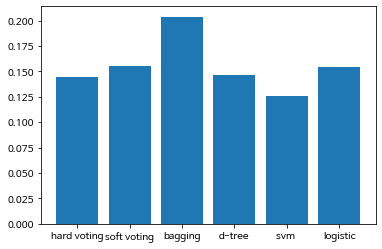

In [57]:
x = np.arange(6)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, rf_predt),
                    accuracy_score(y_test, dt_p),
                    accuracy_score(y_test, svm_p),
                    accuracy_score(y_test, lr_p)


            ])
plt.xticks(x, ['hard voting','soft voting', 'bagging','d-tree' ,'svm ','logistic']);

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [59]:
gbc=GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
hist=HistGradientBoostingClassifier(random_state=42).fit(X_train, y_train)
xgb=XGBClassifier(random_state=42,).fit(X_train, y_train)
lgbm=LGBMClassifier(random_state=42).fit(X_train, y_train)

In [60]:
gbc_p = gbc.predict(X_test)
hist_p = hist.predict(X_test)
xgb_p = xgb.predict(X_test)
lgbm_p = lgbm.predict(X_test)

In [61]:
print("[accuarcy]")
print("gbc: ",accuracy_score(y_test, gbc_p))
print("svm   : ",accuracy_score(y_test,hist_p))
print("xgb   : ",accuracy_score(y_test, xgb_p))
print("lgbm   : ",accuracy_score(y_test, lgbm_p))

[accuarcy]
gbc:  0.24327458256029685
svm   :  0.26762523191094617
xgb   :  0.22147495361781075
lgbm   :  0.2618274582560297
